In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy.distance
from geopy.geocoders import Nominatim
import geopy.distance
import folium

In [ ]:
df=pd.read_csv("/content/ev-charging-stations-india.csv")
df.head(10)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.2568,12.0
6,SG Jabli DC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
7,SG Jabli AC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
8,SG Karnal DC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0
9,SG Karnal AC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [ ]:
df.shape

(1547, 7)

In [ ]:
df.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [ ]:
df.drop(['address'], axis=1)
df.drop(['type'], axis=1)

,name,state,city,address,lattitude,longitude
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800
...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1496 non-null   object 
 1   state      1496 non-null   object 
 2   city       1496 non-null   object 
 3   address    1496 non-null   object 
 4   lattitude  1496 non-null   object 
 5   longitude  1496 non-null   float64
 6   type       1496 non-null   float64
dtypes: float64(2), object(5)
memory usage: 93.5+ KB


In [ ]:
df['lattitude'].unique()

array(['29.6019', '28.4673', '27.8751', ..., '28.411072', '32.7064117',
       '12.885716'], dtype=object)

In [ ]:
df['lattitude'] = df['lattitude'].replace('10.0804337,','10.0804337')

In [ ]:
df['lattitude']=df['lattitude'].astype(float)

In [ ]:
df.duplicated(keep='first').sum()


205

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.nunique()

name         1100
state          59
city          338
address      1173
lattitude    1161
longitude    1161
type           18
dtype: int64

In [ ]:
df['state'].unique()

array(['Haryana', 'Rajasthan', 'Uttar Pradesh', 'Himachal Pradesh',
       'Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttarakhand', 'Gujarat',
       'Goa', 'Telangana', 'Karnataka', 'Punjab', 'Odisha', 'Pondicherry',
       'TamilNadu', 'Uttrakhand', 'WestBengal', 'Harayana', 'Chandigarh',
       'Hyderabadu00a0', 'Kerala', 'AndhraPradesh', 'TamiNadu',
       'Jharkhand', 'Bihar', 'West Bengal', 'Jammu', 'Andhra Pradesh',
       'Chhattisgarh', 'Madhya Pradesh', 'Andhra pradesh', 'Puducherry',
       'Jammu & Kashmir', 'Assam', 'Sikkim', 'Uttarakhand ', 'TAMIL NADU',
       'Andhra Pradesh ', 'Bhubhaneswar', 'Chattisgarh', 'chattisgarh',
       'Chikhali', 'Delhi NCR', 'Ernakulam', 'Hisar', 'Hyderabad',
       'Jajpur', 'Kochi', 'Limbdi', 'Maharashra', 'PUNJAB', 'Rajahmundry',
       'TELENGANA', 'Uttarkhand', 'Andra Pradesh', 'Karala', 'Tripura',
       'Andaman'], dtype=object)

In [ ]:
df['state'] = df['state'].replace(['Uttarakhand','Uttarkhand','TamilNadu','TamiNadu','Hyderabadu00a0','Karala','chattisgarh'],['Uttrakhand','Uttrakhand','Tamil Nadu','Tamil Nadu','Hyderabad','Kerala','Chattisgarh'])

In [ ]:
df['state'] = df['state'].replace(['WestBengal','AndhraPradesh','Andhra pradesh','Andhra Pradesh ','Andra Pradesh','Maharashra'],['West Bengal','Andhra Pradesh','Andhra Pradesh','Andhra Pradesh','Andhra Pradesh','Maharashtra'])

In [ ]:
df['state'] = df['state'].replace(['TELENGANA','PUNJAB','Jammu','Jammu & Kashmir','Bhubhaneswar','Chandigarh','Pondicherry','Uttrakhand','TAMIL NADU','Chattisgarh','Chikhali','Delhi NCR','Ernakulam', 'Hisar', 'Jajpur','Kochi', 'Limbdi','Rajahmundry','Harayana','Hyderabad'],['Telangana','Punjab','Jammu and Kashmir','Jammu and Kashmir','Odisha','Punjab','Puducherry','Uttarakhand ','Tamil Nadu','Chhattisgarh','Maharashtra','Delhi','Kerala','Haryana','Odisha','Kerala','Gujarat','Andhra Pradesh','Haryana','Telangana'])

In [ ]:
df['state'] = df['state'].replace('Uttarakhand ','Uttarakhand')

In [ ]:
df['city'].unique()

array(['Gurugram', 'Behror', 'Khatauli', 'Una', 'Kasauli', 'Karnal',
       'karnal', 'Darbaripur', 'Pune', 'New Delhi', 'Mettupalayam',
       'Khopoli', 'Dehradun', 'Ahmedabad', 'Lonavla', 'Kukas', 'Pushkar',
       'Gurgaon', 'Meerut', 'Mira Bhayandar', 'Secunderabad', 'Mumbai',
       'Dindori', 'Sangli', 'Marunji', 'Saharanpur', 'Shela', 'Gajraula',
       'Beawar Khas', 'Bengaluru', 'Metikuppe', 'Haridwar', 'Mahad',
       'Thane', 'Natt', 'Vadodara', 'Coimbatore', 'Bhimtal', 'Nagaon',
       'Pimpri-Chinchwad', 'Vasai-Virar', 'Greater Noida', 'Jaipur',
       'Nashik', 'bengaluru', 'pune', 'chennai', 'hyderabad', 'delhi',
       'ahmedabad', 'kochi', 'mumbai', 'calicut', 'coimbatore', 'kolkata',
       'gurugram', 'noida', 'indore', 'raipur', 'tiruchirappalli',
       'nashik', 'jaipur', 'ghaziabad', 'hubli', 'surat', 'visakhapatnam',
       'trivandrum', 'malappuram', 'goa', 'mysore', 'vijayawada',
       'siliguri', 'lucknow', 'nagpur', 'guwahati', 'faridabad',
       'belgaum

In [ ]:
df['city'] = df['city'].str.lower()
df['city'] = df['city'].str.capitalize()

In [ ]:
u=df['city'].unique()
print(sorted(u))



['Adilabad', 'Adoor', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Ajmer', 'Alappuzha', 'Aligarh', 'Aluva', 'Amboli', 'Ambur', 'Amravati', 'Amravati, mh', 'Amritsar', 'Anantapur', 'Anantapuram', 'Ananthapur', 'Angamali', 'Angul', 'Attur', 'Aurangabad', 'Avinashi', 'Ayodhya', 'Balasore', 'Bangalore', 'Banglore', 'Baramati', 'Bardhaman', 'Bareilly', 'Barog', 'Basavakalyan', 'Bayamari', 'Bayarmari', 'Beawar khas', 'Beesalpur', 'Behror', 'Belgaum', 'Belgavi', 'Bellary', 'Bengaluru', 'Berhampur', 'Bhagalpur', 'Bharuch', 'Bhilai', 'Bhilwara', 'Bhimavaram', 'Bhimtal', 'Bhopal', 'Bhubaneswar', 'Bhuj', 'Bhuvanagiri', 'Bilaspur', 'Bokaro', 'Butibori', 'Calicut', 'Chakan', 'Chandigarh', 'Changanassery', 'Changodar', 'Chengalpattu', 'Chengampalli', 'Chennai', 'Chidambaram', 'Chikmagalur', 'Chittoor', 'Chittorgarh', 'Chouk', 'Coimbatore', 'Coochbehar', 'Cuttack', 'Darbaripur', 'Darjeeling', 'Dausa', 'Davangere', 'Dehradun', 'Delhi', 'Dhanbad', 'Digha', 'Dindigul', 'Dindori', 'Durgapur', 'Electro

In [ ]:
df['city'] = df['city'].replace(['Gurgaon','Vandalur, chennai','Amravati, mh','Ananthapur','Banglore','Bayamari','Bangalore','Hyderbad','Kochi ','Lonavla','Mohali ','Mumbai ','Mysore','Pondicherry','Thiruvanthapuram','Tirupathi','Trivandrum'],['Gurugram','Vandalur','Amravati','Anantapur','Bengaluru','Bayarmari','Bengaluru','Hyderabad','Kochi','Lonavala','Mohali','Mumbai','Mysuru','Puducherry','Thiruvananthapuram','Tirupati','Thiruvananthapuram'])

In [ ]:
df.nunique()

name         1100
state          27
city          268
address      1173
lattitude    1161
longitude    1161
type           18
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1291 non-null   object 
 1   state      1291 non-null   object 
 2   city       1291 non-null   object 
 3   address    1291 non-null   object 
 4   lattitude  1291 non-null   float64
 5   longitude  1291 non-null   float64
 6   type       1291 non-null   float64
dtypes: float64(3), object(4)
memory usage: 80.7+ KB


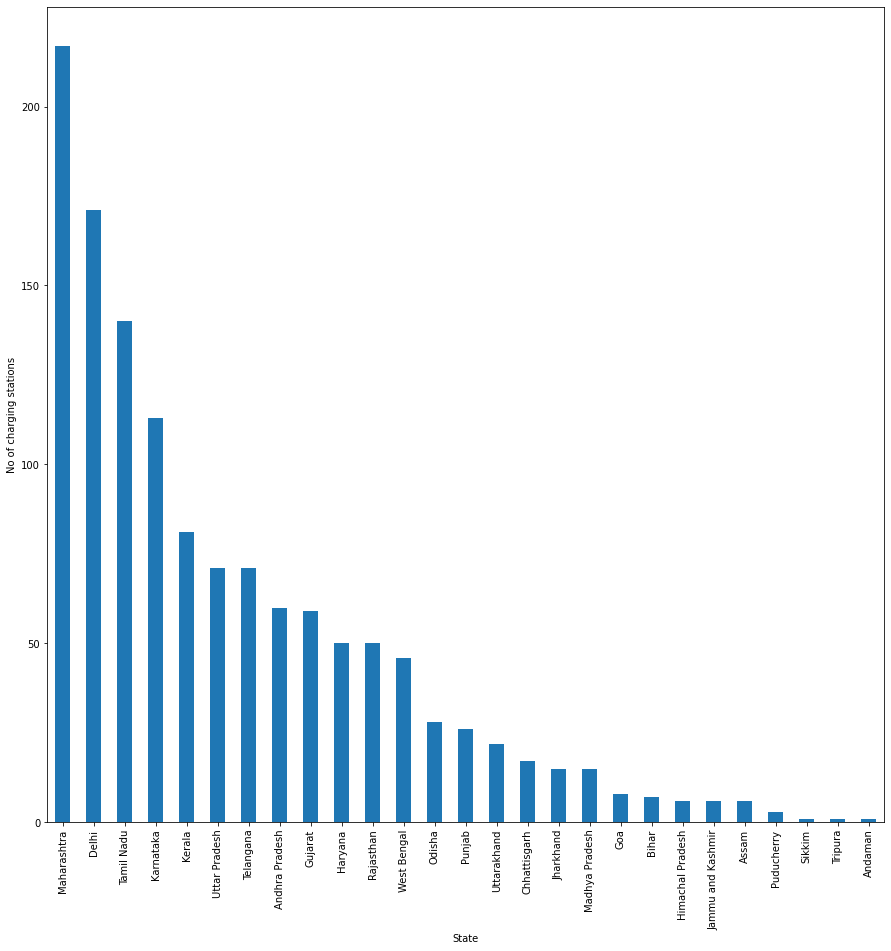

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
df['state'].value_counts().plot(ax=ax, kind='bar', xlabel='State', ylabel='No of charging stations')

plt.show()

In [ ]:
df2= df["city"].value_counts()
print(df2)

Bengaluru       110
Delhi            76
New delhi        72
Chennai          66
Mumbai           63
               ... 
Keonjhar          1
Dausa             1
Beesalpur         1
Shahjahanpur      1
Munnar            1
Name: city, Length: 268, dtype: int64


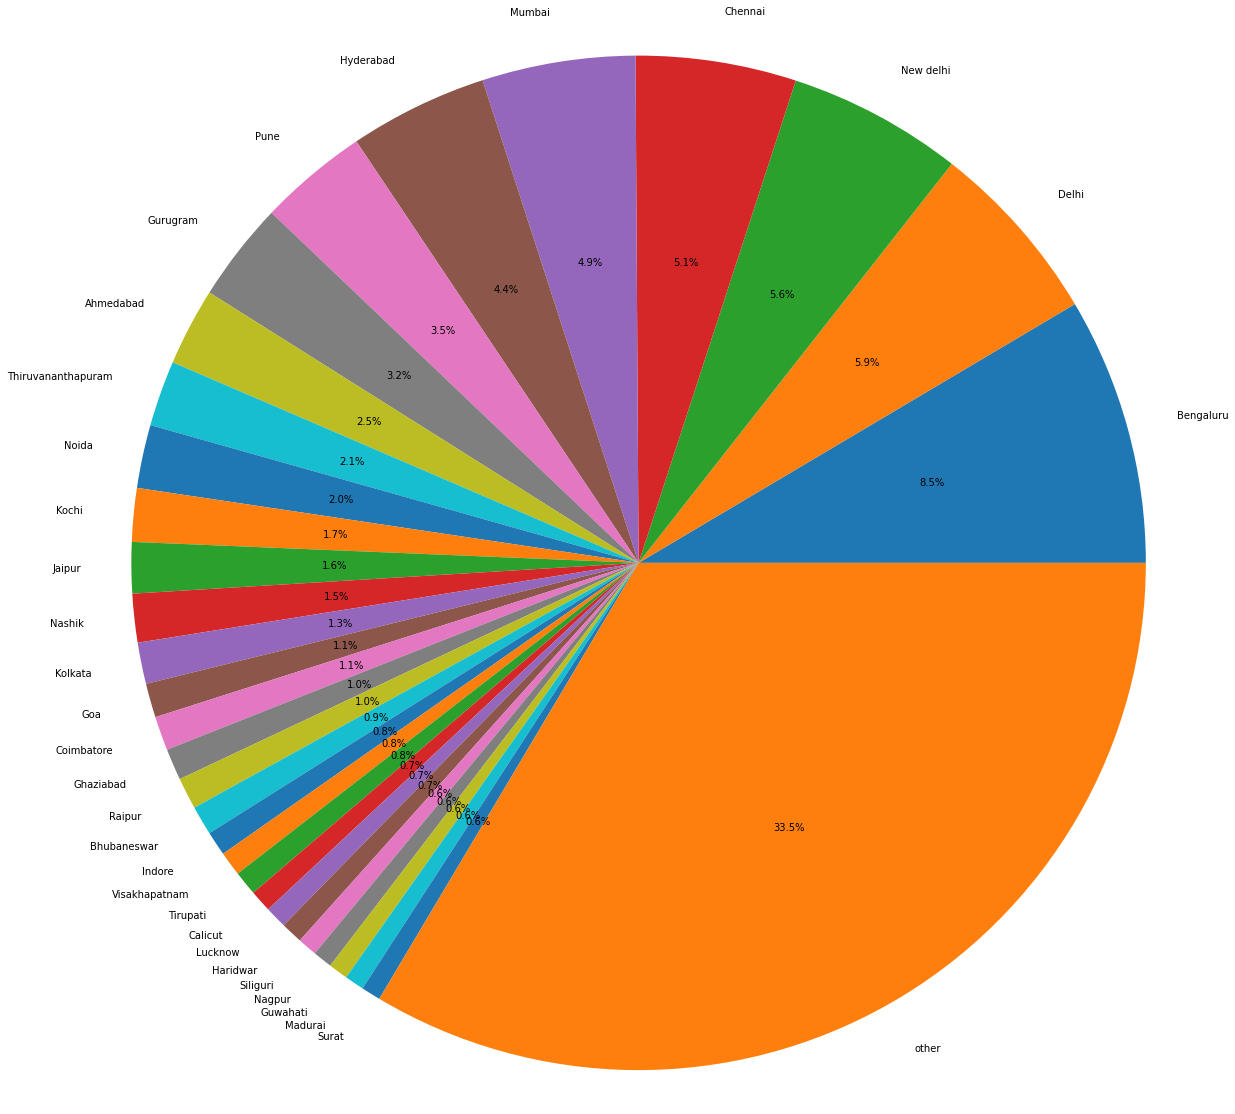

In [ ]:
# Use DataFrame.to_dict() to convert DataFrame to dictionary
df2= df["city"].value_counts()
dictdf = df2.to_dict()
dictdf['other']=0
count=0
for city in dictdf:
  if dictdf[city]<8 and city != 'other':
    count=count+dictdf[city]
    dictdf['other']=count
    #del dict[city]
for k in list(dictdf.keys()):
    if dictdf [k] < 8:
        del dictdf[k]
#print(dictdf)
labels = []
sizes = []

for x, y in dictdf.items():
    labels.append(x)
    sizes.append(y)

plt.figure(figsize=(20,20))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

plt.axis('equal')
plt.show()

In [ ]:
geolocator = Nominatim(user_agent="MyApp")

your_loc=input("Enter your current address:")

location = geolocator.geocode(your_loc)

lat=location.latitude
lon=location.longitude

# print("The latitude of the location is: ", location.latitude)
# print("The longitude of the location is: ", location.longitude)

Enter your current address:Ponda, Goa


In [ ]:
map=folium.Map(zoom_start=15)

d={}
md={'min_dist':2000}
map.add_child(folium.Marker(location=[lat,lon],popup='Current Location',icon=folium.Icon(color='blue')))

for i in df.index:
    temp=[]
    #tempmd=[]
    dlat=df['lattitude'][i]
    dlon=df['longitude'][i]
    
    coords_1 = (lat, lon)
    coords_2 = (dlat, dlon)

    dist= geopy.distance.geodesic(coords_1, coords_2).km

    
    n=df["name"][i]
    c=df['city'][i]

    if dist<md['min_dist']:
      md['min_dist']=dist
      tempmd=[n, c, dist, dlat, dlon]

    if dist < 10:
      temp.append(n)
      temp.append(c)
      temp.append(dist)
      temp.append(dlat)
      temp.append(dlon)

      d[n]=temp
      #map=folium.Map(location=[dlat,dlon],zoom_start=15)
      map.add_child(folium.Marker(location=[dlat,dlon],popup=n,icon=folium.Icon(color='green')))
      

md['min_dist']=tempmd

if len(d)==0:
  mdlat=md['min_dist'][3]
  mdlon=md['min_dist'][4]
  mdn=md['min_dist'][0]
  map.add_child(folium.Marker(location=[mdlat,mdlon],popup=mdn,icon=folium.Icon(color='green')))

#print(md)
map.save('map.html')      
#print(d)

In [ ]:
if len(d)>0:

    print("{:<50} {:<30} {:<30} {:<30} {:<30}".format('NAME', 'CITY','DISTANCE IN KM', 'LATTITUDE', 'LONGITUDE'))
    for key, value in d.items():
        name, city, distance, lattitude, longitude = value
        print("{:<50} {:<30} {:<30} {:<30} {:<30}".format(name, city, distance, lattitude, longitude))
else:
    print("Sorry There are no EV charging stations within a 10km radius")
    print("The closest EV charging station is:")
    print("")

    
    print("{:<50} {:<30} {:<30} {:<30} {:<30}".format('NAME', 'CITY','DISTANCE IN KM', 'LATTITUDE', 'LONGITUDE'))
    for key, value in md.items():
        name, city, distance, lattitude, longitude = value
        print("{:<50} {:<30} {:<30} {:<30} {:<30}".format(name, city, distance, lattitude, longitude))

    


Sorry There are no EV charging stations within a 10km radius
The closest EV charging station is:

NAME                                               CITY                           DISTANCE IN KM                 LATTITUDE                      LONGITUDE                     
Old Goa Residency- Blive                           Goa                            14.781899292003052             15.5000488654027               73.9141273127392              
